In [70]:
import pandas as pd
import seaborn as sns

In [71]:
df = pd.read_csv('../Salary_Data.csv')
df

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891
5,2.9,23.0,56642
6,3.0,23.0,60150
7,3.2,23.3,54445
8,3.2,23.3,64445
9,3.7,23.6,57189


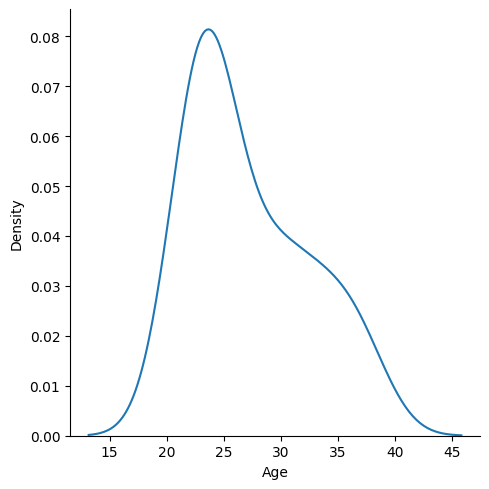

In [100]:
sns.displot(df['Age'], kind='kde')

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
xData = df.iloc[:, :2]
yData = df.iloc[:, 2:3]

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xData, yData, test_size=0.3, random_state=None)

In [75]:
scaler.fit(x_train)
x_trainScaler = scaler.transform(x_train)
x_testScaler = scaler.transform(x_test)

scaler.fit(y_train)
y_trainScaler = scaler.transform(y_train)
y_testScaler = scaler.transform(y_test)

In [76]:
# x_trainScaler = pd.DataFrame(x_trainScaler, columns=['Age', 'Experience'])
# x_testScaler = pd.DataFrame(x_testScaler, columns=['Age', 'Experience'])
# y_trainScaler = pd.DataFrame(y_trainScaler, columns=['Salary'])
# y_testScaler = pd.DataFrame(y_testScaler, columns=['Salary'])

In [77]:
y_trainScaler.shape

(21, 1)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
withoutFS = LogisticRegression()
withFS = LogisticRegression()

In [80]:
model = withoutFS.fit(x_train, y_train)
# withFS.fit(x_trainScaler, y_trainScaler)

/workspaces/ml_practicals/mlvenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/workspaces/ml_practicals/mlvenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1201: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)
/workspaces/ml_practicals/mlvenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

In [81]:
from sklearn.metrics import accuracy_score

In [92]:
y_pred = pd.DataFrame(model.predict(x_test), columns=['Salary'])
accuracy_score(y_test, y_pred)

0.0

In [89]:
y_pred

,Salary
0,46205
1,43525
2,91738
3,67938
4,46205
5,67938
6,116969
7,57081
8,46205


In [88]:
y_test

,Salary
2,37731
6,60150
19,93940
16,66029
0,39343
11,55794
25,105582
9,57189
4,39891
